# <font style="color:rgb(50, 120, 229);"> Proyecto 1: Clasificación de frutas </font>

**Objetivo:**

El objetivo de este proyecto es utilizar el dataset **Fresh and Rotten Fruits** para crear un modelo de clasificación que permita diferenciar entre frutas frescas y frutas podridas.

El dataset contiene imágenes de las siguientes frutas:

- Fresh apples
- Fresh bananas
- Fresh oranges
- Rotten apples
- Rotten bananas
- Rotten oranges

**Puedes utilizar un modelo pre-entrenado o entrenar tu propio modelo desde cero.**

<font style="color:rgb(50, 120, 229);">Recomedaciones:</font>

- Entrena el modelo en Google Colab.
- Recuerda activar la GPU en Google Colab para acelerar el entrenamiento. Para hacerlo ve a `Entorno de ejecución` -> `Cambiar tipo de entorno de ejecución` -> Selecciona `GPU`.

In [ ]:
#Actualizar TensorFlow a la última versión
%pip install tensorflow --upgrade -q

## <font style="color:rgb(50, 120, 229);"> 1. Descargar el dataset </font>

El dataset se encuentra en kaggle por lo que es importante que cuentes con tu archivo `kaggle.json` para poder descargar el dataset.

In [ ]:
%pip install -q kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d pedrodavidjuarez/fresh-vs-rotten-fruits
!unzip fresh-vs-rotten-fruits.zip

Dataset URL: https://www.kaggle.com/datasets/pedrodavidjuarez/fresh-vs-rotten-fruits
License(s): MIT
 99% 254M/256M [00:15<00:00, 22.6MB/s]
100% 256M/256M [00:15<00:00, 17.4MB/s]
Archive:  fresh-vs-rotten-fruits.zip
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.36 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.49 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 4.59.57 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.03 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.12 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.18 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.26 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.35 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-06-08 at 5.00.43 PM.png  
  inflating: fruits/train/freshapples/Screen Shot 2018-

## <font style="color:rgb(50, 120, 229);"> 2. Importar el dataset </font>

Una vez descargado el dataset, importa las librerías necesarias y realiza la importación del dataset utilizando la función `image_dataset_from_directory` de Keras.

El dataset tiene la siguiente estructura:

```bash
fruits/
    │
    └───train/
    └───valid/
```

In [ ]:
from keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    directory="fruits/train",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

val_dataset = image_dataset_from_directory(
    directory="fruits/valid",
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True
)

Found 1182 files belonging to 6 classes.
Found 329 files belonging to 6 classes.


## <font style="color:rgb(50, 120, 229);"> 3. Explorar el dataset </font>

Muestra las clases del dataset utilizando el atributo `class_names` del dataset.

Con esto tendrás una idea de cuántas clases hay en el dataset y que orden siguen.

In [ ]:
class_names = train_dataset.class_names
print(class_names)

['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


Toma un `batch` de imágenes del dataset utilizando la función `take` y visualiza algunas imágenes.

Esto te permitirá conocer la estructura del dataset y verificar que las imágenes se han importado correctamente.

[0. 1. 0. 0. 0. 0.] ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


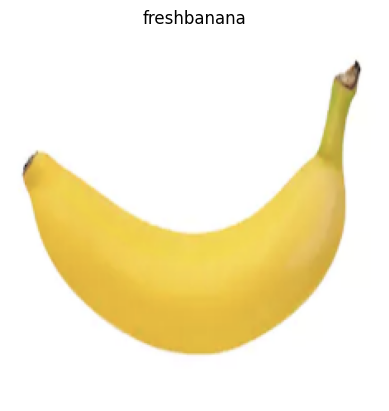

[0. 0. 0. 0. 1. 0.] ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


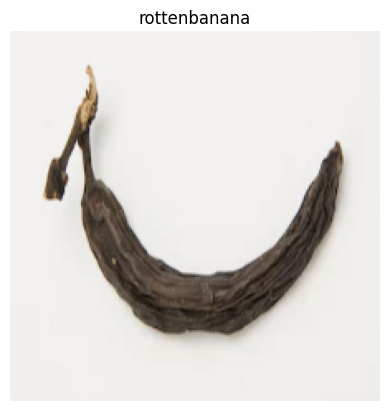

[0. 0. 0. 0. 1. 0.] ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


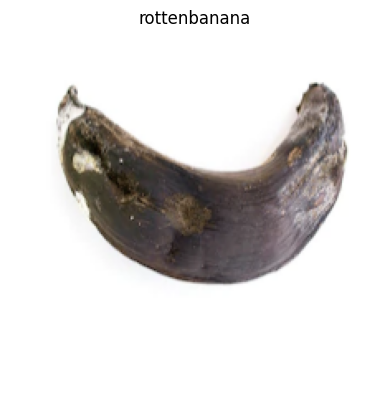

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

for images, labels in train_dataset.take(1):
    for idx in range(3):
        image = images[idx].numpy().astype(np.uint8)
        label = labels [idx].numpy()
        print(label, class_names)
        label = label.argmax()
        class_name = class_names[label]

        plt.imshow(image)
        plt.axis("off")
        plt.title(class_name)
        plt.show()
    break

## <font style="color:rgb(50, 120, 229);"> 4. Crear el modelo </font>

Crea un modelo de clasificación que permita diferenciar entre frutas frescas y frutas podridas.

**Se recomienda utilizar un modelo pre-entrenado.**

In [ ]:
from keras.applications import VGG16

base_model = VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(224, 224, 3)
)

base_model.trainable = True

num_layers_fine_tune = 5
num_layers = len(base_model.layers)

for layer in base_model.layers[:num_layers - num_layers_fine_tune]:
    print(f"Layer {layer.name} will be frozen")
    layer.trainable = False

from keras.models import Model
from keras.layers import Dense, Flatten, Input, RandomFlip, RandomZoom
from keras.applications.vgg16 import preprocess_input

input_layer = Input(shape=(224,224,3))
x = preprocess_input(input_layer)
x = base_model(x)
x = Flatten()(x)
x = Dense(units=1024, activation="relu")(x)
x = Dense(units=512, activation="relu")(x)
output = Dense(units=6, activation="softmax")(x)

fruit_model = Model(input_layer, output)

fruit_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Layer input_layer will be frozen
Layer block1_conv1 will be frozen
Layer block1_conv2 will be frozen
Layer block1_pool will be frozen
Layer block2_conv1 will be frozen
Layer block2_conv2 will be frozen
Layer block2_pool will be frozen
Layer block3_conv1 will be frozen
Layer block3_conv2 will be frozen
Layer block3_conv3 will be frozen
Layer block3_pool will be frozen
Layer block4_conv1 will be frozen
Layer block4_conv2 will be frozen
Layer block4_conv3 will be frozen


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item (GetItem)        │ (None, 224, 224)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_1 (GetItem)      │ (None, 224, 224)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ get_item_2 (GetItem)      │ (None, 224, 224)       │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stack (Stack)             │ (None, 224, 224, 3)    │              0 │ get_item[0][0],        │
│                           │                        │                │ get_item_1[0][0],      │
│                           │                        │                │ get_item_2[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 224, 224, 3)    │              0 │ stack[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ vgg16 (Functional)        │ (None, 7, 7, 512)      │     14,714,688 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 25088)          │              0 │ vgg16[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │     25,691,136 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 512)            │        524,800 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 6)              │          3,078 │ dense_1[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 40,933,702 (156.15 MB)

 Trainable params: 33,298,438 (127.02 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

## <font style="color:rgb(50, 120, 229);"> 5. Entrenar el modelo </font>

Entrena el modelo utilizando el dataset de entrenamiento y valida el modelo utilizando el dataset de validación.

Debes incluir lo siguiente:

- El uso de `EarlyStopping` para evitar el sobreajuste.
- El uso de `ModelCheckpoint` para guardar el mejor modelo.

El modelo debe de guardarse con la extensión `.keras`. Para versiones anteriores de TensorFlow, el modelo se guarda con la extensión `.h5`.

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 51s 913ms/step - accuracy: 0.5840 - loss: 1.2168 - val_accuracy: 0.9392 - val_loss: 0.0665
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 347ms/step - accuracy: 0.9737 - loss: 0.0291 - val_accuracy: 0.9696 - val_loss: 0.0336
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - accuracy: 0.9998 - loss: 0.0034 - val_accuracy: 0.9787 - val_loss: 0.0351
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 192ms/step - accuracy: 1.0000 - loss: 7.6416e-04 - val_accuracy: 0.9757 - val_loss: 0.0338
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 359ms/step - accuracy: 1.0000 - loss: 2.4228e-04 - val_accuracy: 0.9787 - val_loss: 0.0298
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 221ms/step - accuracy: 1.0000 - loss: 6.8569e-05 - val_accuracy: 0.9787 - val_loss: 0.0304
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 226ms/step - accuracy: 1.0000 - loss: 4.9200e-05 - val_accuracy: 0.9787 - val_loss: 0.0303
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 227ms/step - accuracy: 1.0000 - loss: 3.7

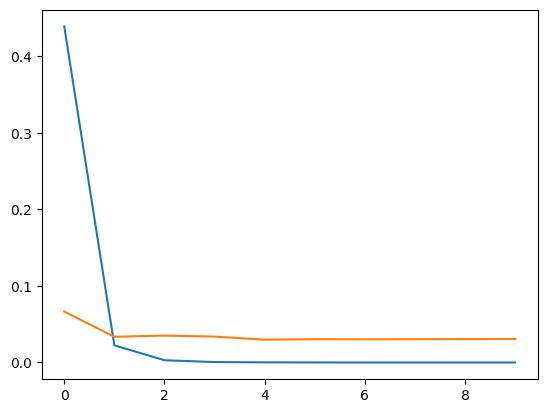

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

adam = Adam(learning_rate=0.0001)
fruit_model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"])

early_stop = EarlyStopping(monitor="val_loss", patience=5)
checkpoint = ModelCheckpoint("./best_model.keras", monitor="val_loss", save_best_only=True)

history = fruit_model.fit(train_dataset, validation_data=val_dataset, epochs=50, callbacks=[early_stop, checkpoint])

loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(loss)
plt.plot(val_loss)

## <font style="color:rgb(50, 120, 229);"> 6. Descargar el modelo </font>

Descarga el modelo y guárdalo en tu computadora. Esto puede tardar unos minutos.

In [ ]:
from google.colab import files
fruit_model.save('fruit_model.keras')
files.download('fruit_model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## <font style="color:rgb(50, 120, 229);"> 7. Prueba el modelo </font>

El siguiente código carga un grupo de imágenes de prueba y las clasifica utilizando el modelo que acabas de entrenar.

In [ ]:
from google.colab import files
uploaded = files.upload()

files = [file for file in uploaded.keys()]
print("Files uploaded:", files)

Saving ImgPrueba1.jpg to ImgPrueba1.jpg
Saving ImgPrueba2.jpg to ImgPrueba2.jpg
Saving ImgPrueba3.jpg to ImgPrueba3.jpg
Saving ImgPrueba4.jpg to ImgPrueba4.jpg
Saving ImgPrueba5.jpg to ImgPrueba5.jpg
Files uploaded: ['ImgPrueba1.jpg', 'ImgPrueba2.jpg', 'ImgPrueba3.jpg', 'ImgPrueba4.jpg', 'ImgPrueba5.jpg']


In [ ]:
from keras.models import load_model

model = load_model('./best_model.keras') #Cargar el mejor modelo guardado

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


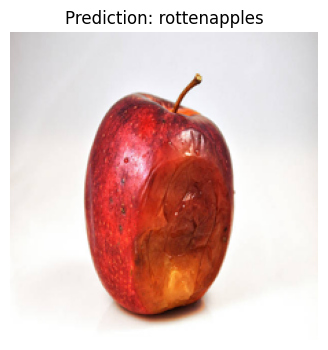

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


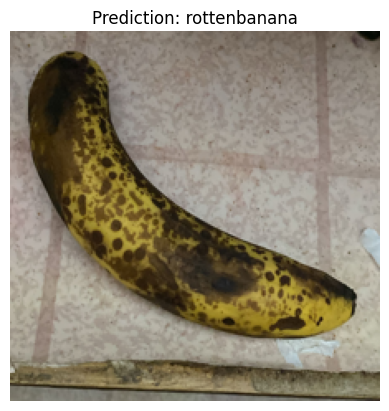

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


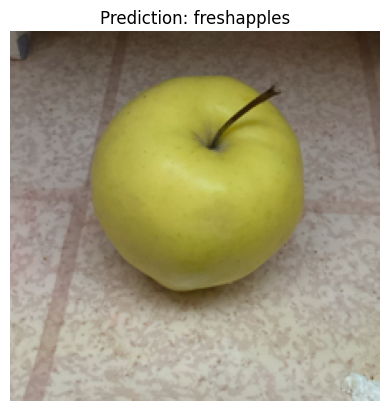

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


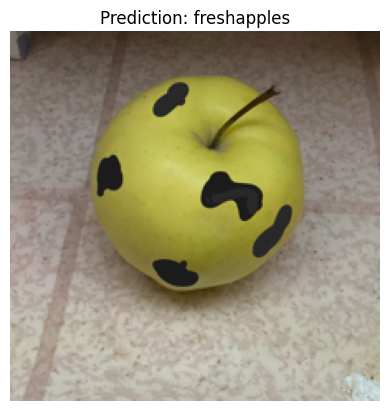

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


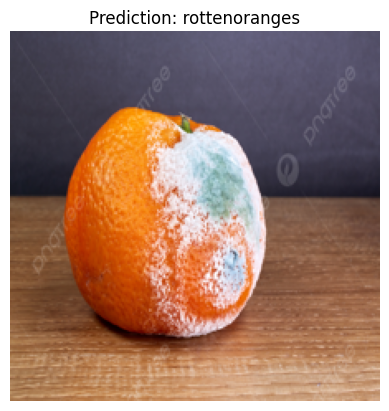

In [ ]:
from PIL import Image
import numpy as np

plt.figure(figsize=(4, 4))

for file in files:
  image = Image.open(file)
  image = image.resize((224, 224)) #Redimensionar la imagen a las dimensiones de entrada del modelo
  image = np.array(image)
  image = np.expand_dims(image, axis=0) # Agregar una dimensión extra para que sea un lote de un solo elemento

  prediction = fruit_model.predict(image)
  class_index = np.argmax(prediction)
  class_name = train_dataset.class_names[class_index]

  plt.imshow(image[0])
  plt.title(f'Prediction: {class_name}')
  plt.axis('off')
  plt.show()